In [10]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# New Section

In [11]:
df = pd.read_csv('2025_06_15_MousedB.csv', sep=';')

In [12]:
df.head()

,Brand,Name,Length (mm),Width (mm),Height (mm),Weight (g),Shape,Hump placement,Front flare,Side curvature,...,Connectivity,Sensor,Sensor technology,Sensor position,DPI,Polling rate,Tracking speed (IPS),Acceleration (G),Side buttons,Middle buttons
0,Pulsar ZywOo,The Chosen Mouse - Mini,115.6,63.4,40.7,55.0,Ergonomic,Center,Outward - moderate,Inward,...,Wireless,Pulsar XS-1,Optical,Centered (51%),32000,8000,750,50,2,0
1,Pulsar ZywOo,The Chosen Mouse - Medium,122.0,66.0,43.0,59.0,Ergonomic,Center,Outward - moderate,Inward,...,Wireless,Pulsar XS-1,Optical,Centered (51%),32000,8000,750,50,2,0
2,WLmouse,Sword X,123.0,67.0,42.0,47.0,Ergonomic,Center,Outward - moderate,Inward,...,Wireless,PixArt PAW3950 HS,Optical,Centered (52%),30000,8000,750,50,2,0
3,Darmoshark,M3 Micro Pro,105.5,54.6,33.5,42.0,Symmetrical,Back - moderate,Outward - slight,Inward,...,Wireless,PixArt PAW3950,Optical,Front - minimal (54%),30000,8000,750,50,2,0
4,ASUS,ROG Gladius II Wireless,126.0,67.0,45.0,90.0,Ergonomic,Center,Outward - aggressive,Inward,...,Wireless,PixArt PMW3389,Optical,Front - minimal (53%),16000,1000,400,50,2,1


In [13]:
df.tail()

,Brand,Name,Length (mm),Width (mm),Height (mm),Weight (g),Shape,Hump placement,Front flare,Side curvature,...,Connectivity,Sensor,Sensor technology,Sensor position,DPI,Polling rate,Tracking speed (IPS),Acceleration (G),Side buttons,Middle buttons
1033,Xtrfy,M4 Wireless,120.0,68.0,39.0,71.0,Ergonomic,Back - minimal,Inward,No,...,Wireless,PixArt PAW3370,NaN,Centered (50%),19000,NaN,400,50,2,1
1034,Xtrfy,MZ1,111.0,58.5,36.5,56.0,Symmetrical,Flat,Inward,Back - aggressive,...,Wired,PixArt PMW3389,NaN,Centered (51%),16000,NaN,400,50,2,1
1035,Xtrfy,MZ1 Wireless,111.0,58.5,36.5,62.0,Symmetrical,Flat,Inward,Back - aggressive,...,Wireless,PixArt PAW3370,NaN,Centered (51%),19000,NaN,400,50,2,1
1036,Razer,Orochi V2,107.0,62.0,38.0,68.0,Symmetrical,Back - minimal,Inward,Inward - moderate,...,Wireless,Razer Razer 5G,NaN,Front - aggressive (61%),18000,NaN,450,50,2,1
1037,Zowie,EC1-C,130.0,69.0,42.0,80.0,Ergonomic,Center,Inward,No,...,Wired,PixArt PMW3360,NaN,Front - minimal (55%),3200,NaN,250,50,2,0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1038 entries, 0 to 1037
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Brand                 1038 non-null   object 
 1   Name                  1038 non-null   object 
 2   Length (mm)           1038 non-null   float64
 3   Width (mm)            1038 non-null   float64
 4   Height (mm)           1038 non-null   float64
 5   Weight (g)            1038 non-null   object 
 6   Shape                 1038 non-null   object 
 7   Hump placement        1038 non-null   object 
 8   Front flare           1038 non-null   object 
 9   Side curvature        1038 non-null   object 
 10  Hand compatibility    1000 non-null   object 
 11  Thumb rest            1038 non-null   object 
 12  Ring finger rest      1038 non-null   object 
 13  Material              1000 non-null   object 
 14  Connectivity          1038 non-null   object 
 15  Sensor               

In [15]:
df.describe()

,Length (mm),Width (mm),Height (mm)
count,1038.000000,1038.000000,1038.000000
mean,120.337091,65.629672,39.521002
std,8.884800,5.995906,5.214759
min,72.300000,14.400000,19.000000
25%,118.000000,62.225000,38.000000
50%,121.100000,64.300000,39.000000
75%,125.000000,67.000000,41.000000
max,144.500000,100.000000,126.000000


In [16]:
df.dtypes

,0
Brand,object
Name,object
Length (mm),float64
Width (mm),float64
Height (mm),float64
Weight (g),object
Shape,object
Hump placement,object
Front flare,object
Side curvature,object


In [17]:
df.duplicated().sum()

np.int64(0)

In [18]:
df.shape

(1038, 24)

In [19]:
df.isnull().sum()

,0
Brand,0
Name,0
Length (mm),0
Width (mm),0
Height (mm),0
Weight (g),0
Shape,0
Hump placement,0
Front flare,0
Side curvature,0


In [20]:
df.isnull().sum().sum()

np.int64(152)

In [21]:
df.columns

Index(['Brand', 'Name', 'Length (mm)', 'Width (mm)', 'Height (mm)',
       'Weight (g)', 'Shape', 'Hump placement', 'Front flare',
       'Side curvature', 'Hand compatibility', 'Thumb rest',
       'Ring finger rest', 'Material', 'Connectivity', 'Sensor',
       'Sensor technology', 'Sensor position', 'DPI', 'Polling rate',
       'Tracking speed (IPS)', 'Acceleration (G)', 'Side buttons',
       'Middle buttons'],
      dtype='object')

In [22]:
numeric_cols = ['Length (mm)', 'Width (mm)', 'Height (mm)', 'Weight (g)',
                'DPI', 'Polling rate', 'Tracking speed (IPS)', 'Acceleration (G)']

for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

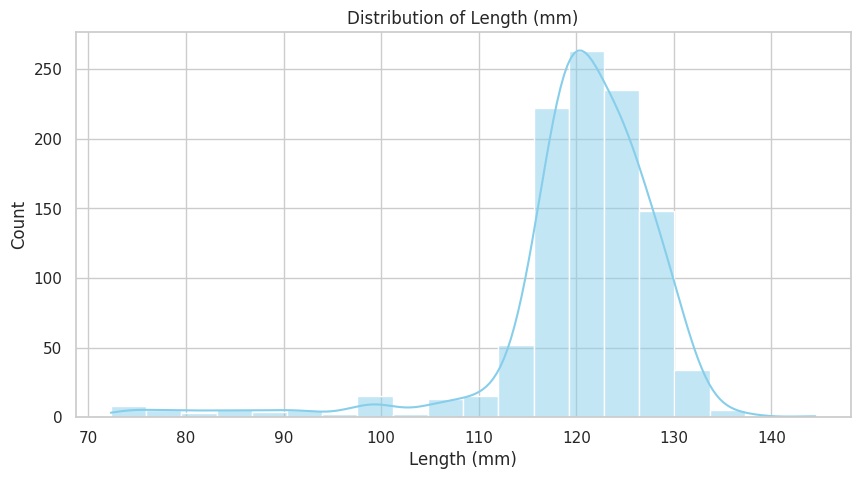

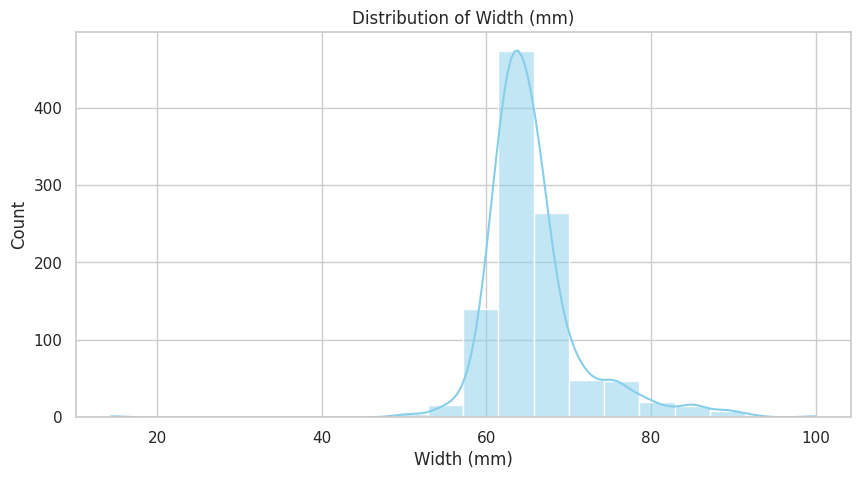

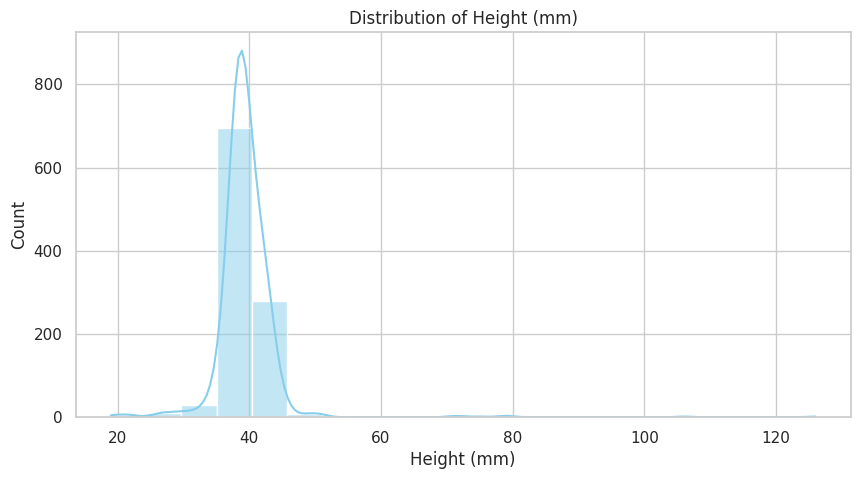

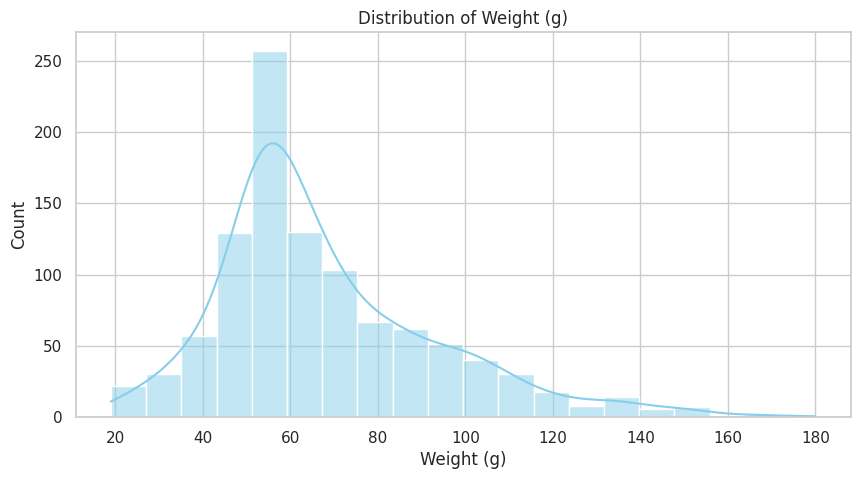

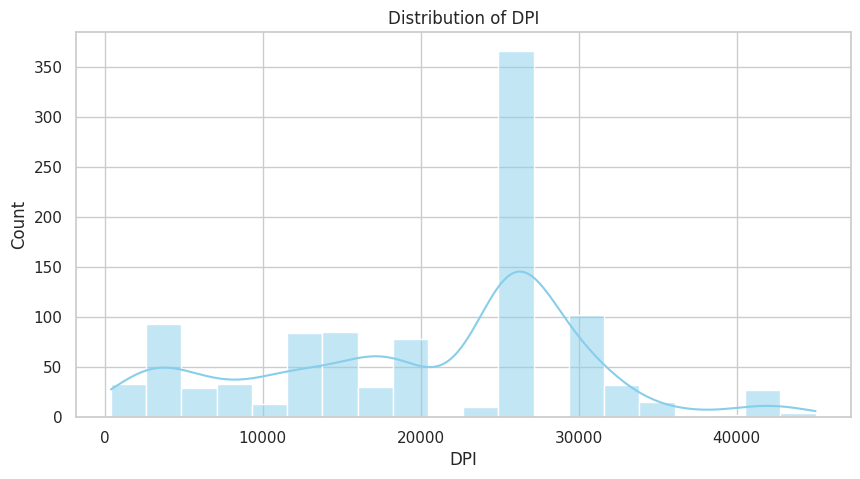

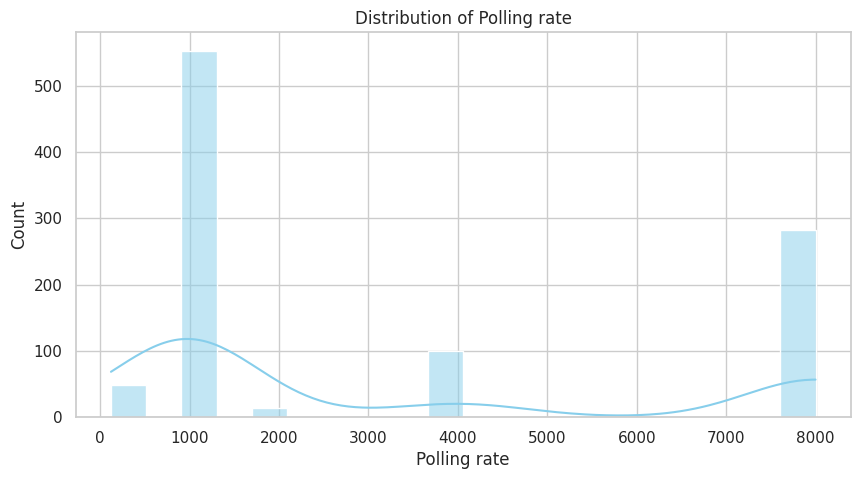

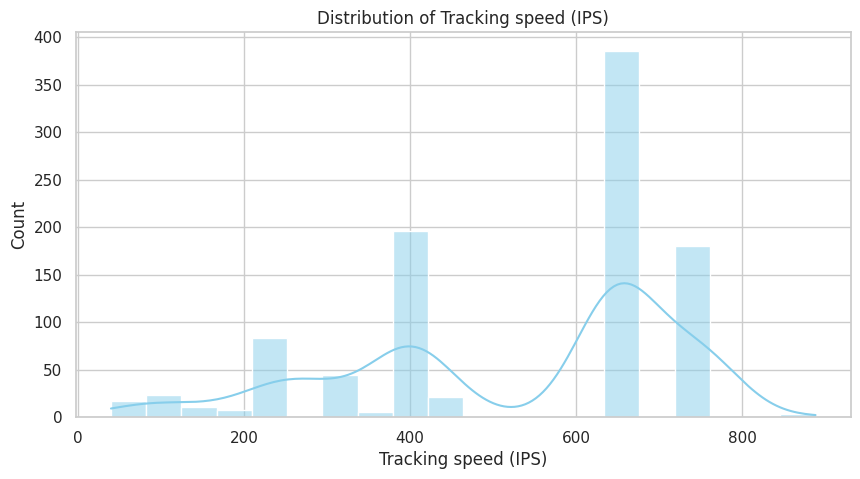

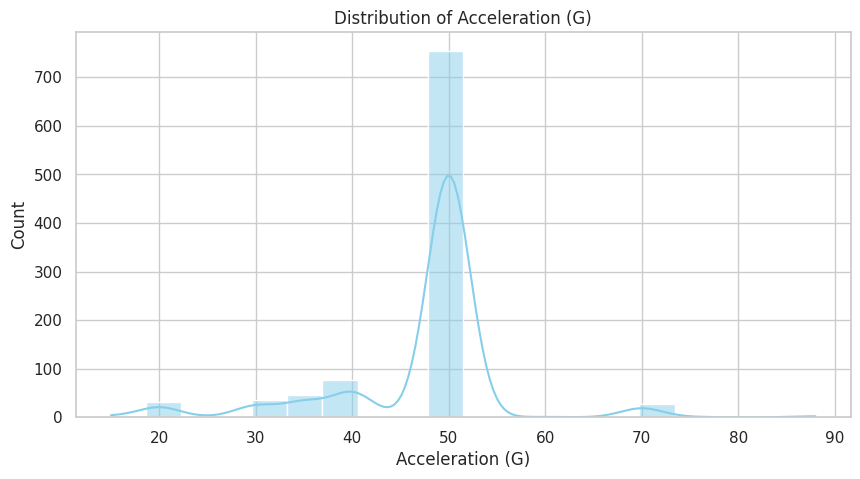

In [23]:
# Set seaborn style
sns.set(style="whitegrid")
plt.rcParams.update({'figure.figsize': (10, 5)})

# 1. Histograms of numeric features
for col in numeric_cols:
    sns.histplot(df[col].dropna(), kde=True, bins=20, color='skyblue')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

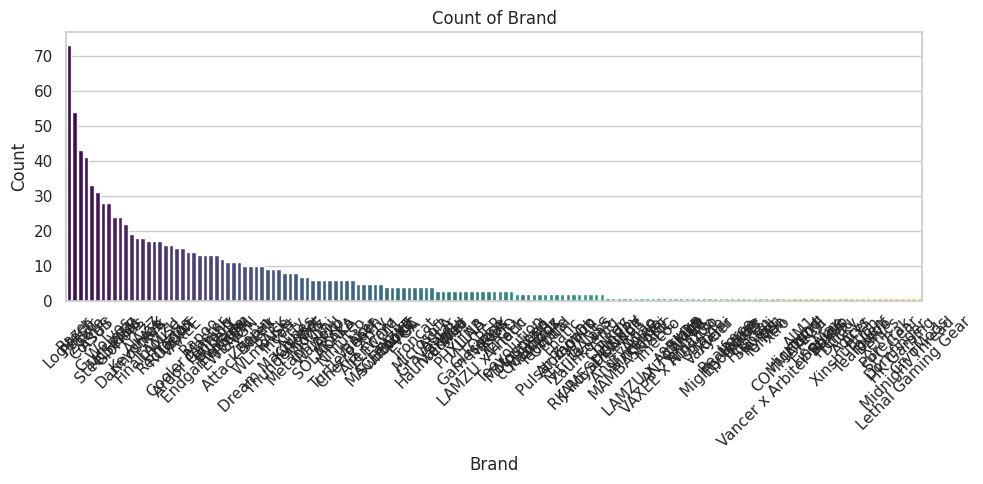

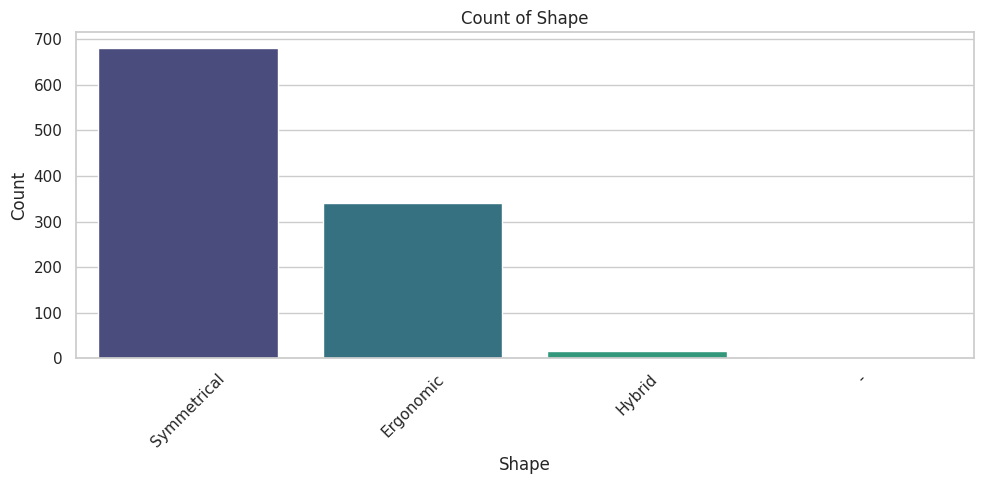

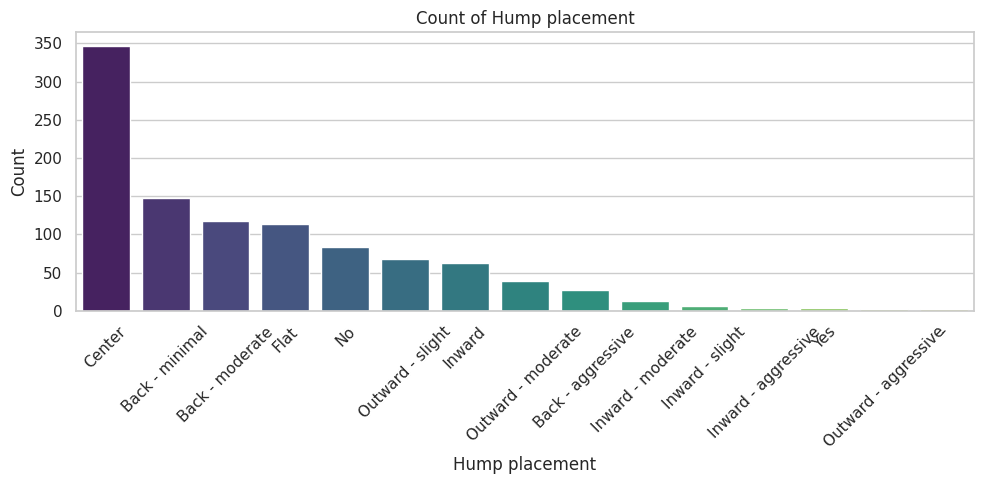

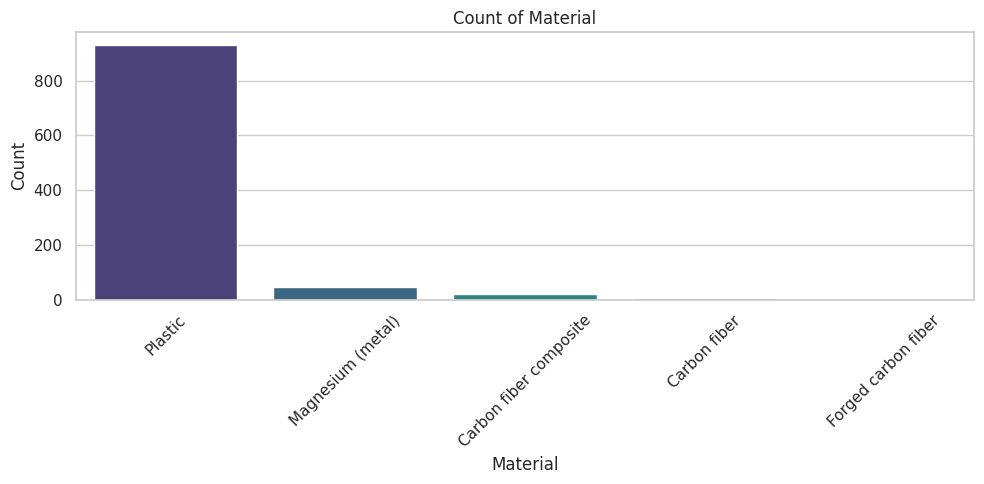

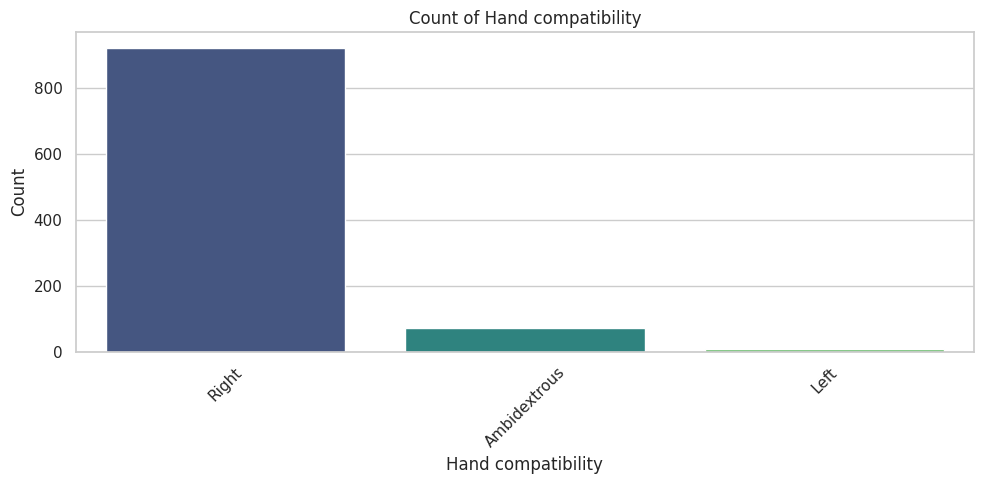

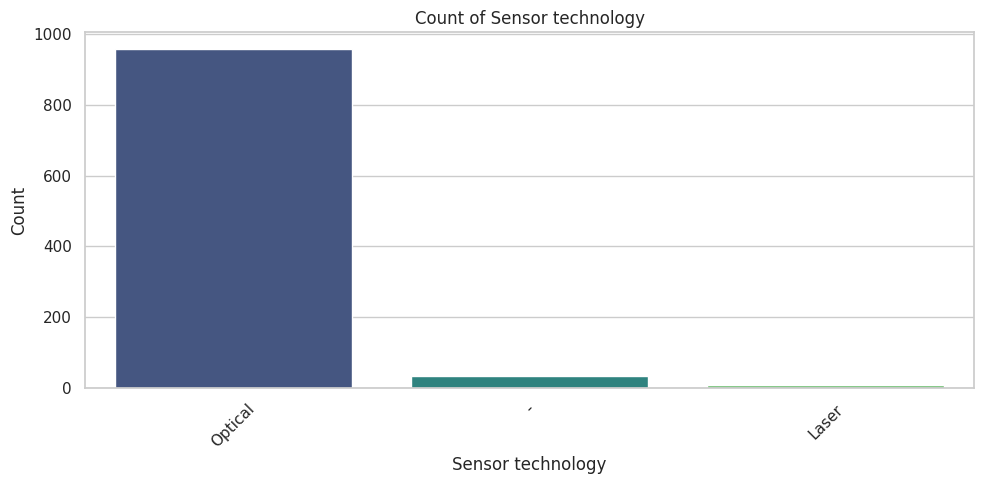

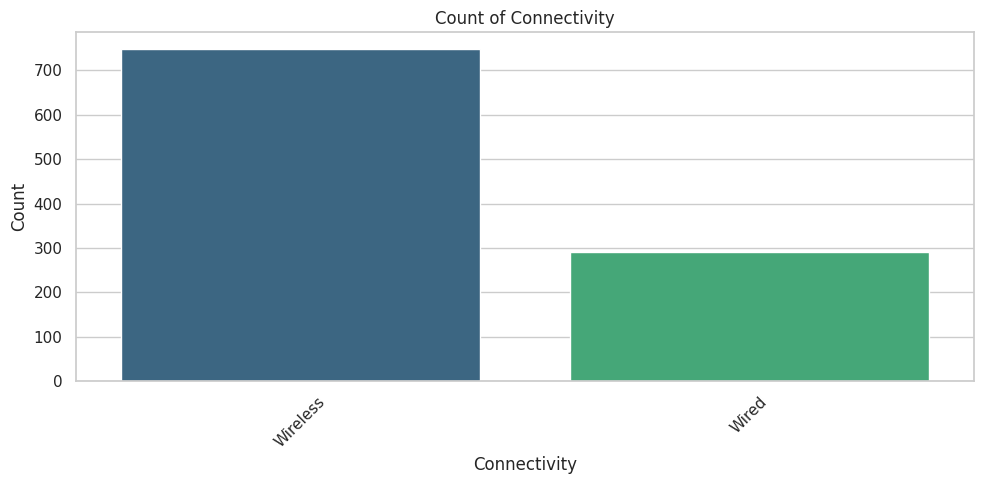

In [24]:
# 2. Count plots for categorical columns
categorical_cols = ['Brand', 'Shape', 'Hump placement', 'Material',
                    'Hand compatibility', 'Sensor technology', 'Connectivity']

for col in categorical_cols:
    sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette="viridis")
    plt.title(f"Count of {col}")
    plt.xticks(rotation=45)
    plt.ylabel("Count")
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()

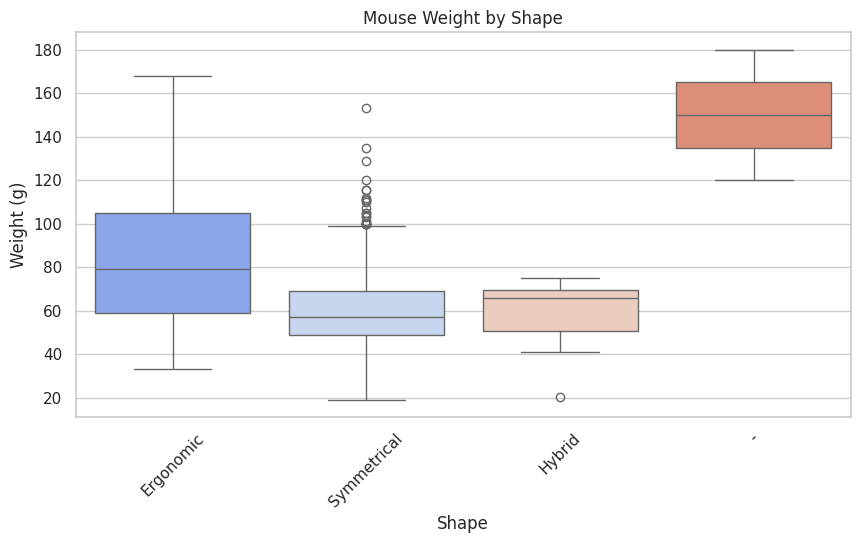

In [25]:
# 3. Boxplot of Weight by Shape
sns.boxplot(data=df, x='Shape', y='Weight (g)', palette="coolwarm")
plt.title("Mouse Weight by Shape")
plt.xticks(rotation=45)
plt.show()

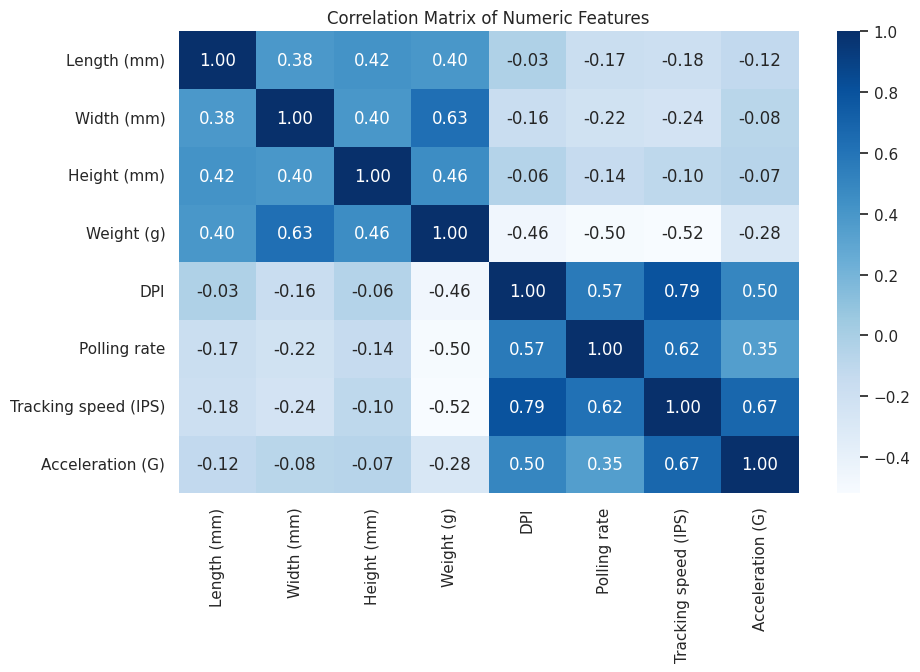

In [26]:
# 4. Correlation heatmap for numeric specs
plt.figure(figsize=(10, 6))
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap='Blues', fmt='.2f')
plt.title("Correlation Matrix of Numeric Features")
plt.show()

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [28]:
# Target column to predict
target_col = 'Shape'

# Drop rows with missing target
df = df.dropna(subset=[target_col])

# Encode all columns (categorical and numeric)
label_encoders = {}
for col in df.columns:
    le = LabelEncoder()
    df[col] = df[col].astype(str)  # convert all to string for encoding
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [29]:
# Split into features and target
X = df.drop(columns=[target_col])
y = df[target_col]

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(),
    "Naive Bayes": GaussianNB(),
    "Gradient Boosting": GradientBoostingClassifier()
}

In [30]:
# Train and evaluate
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = round(acc * 100, 2)

# Display results
print("Model Accuracy (%):")
for model_name, accuracy in results.items():
    print(f"{model_name}: {accuracy}%")

Model Accuracy (%):
Logistic Regression: 89.42%
Decision Tree: 90.38%
Random Forest: 93.75%
K-Nearest Neighbors: 82.21%
Support Vector Machine: 85.1%
Naive Bayes: 39.9%
Gradient Boosting: 94.23%


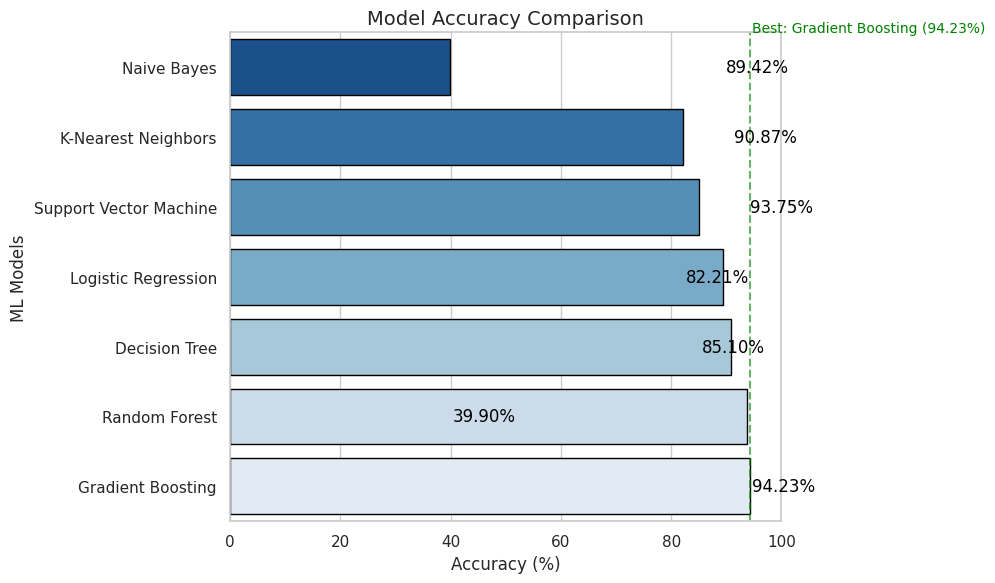

In [31]:
# Model accuracy dictionary
accuracy_dict = {
    "Logistic Regression": 89.42,
    "Decision Tree": 90.87,
    "Random Forest": 93.75,
    "K-Nearest Neighbors": 82.21,
    "Support Vector Machine": 85.10,
    "Naive Bayes": 39.90,
    "Gradient Boosting": 94.23
}

# Convert to DataFrame
df_acc = pd.DataFrame(list(accuracy_dict.items()), columns=['Model', 'Accuracy'])

# Sort by accuracy
df_acc = df_acc.sort_values(by='Accuracy', ascending=True)

# Set seaborn theme
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Plot horizontal barplot with color gradient
barplot = sns.barplot(
    x='Accuracy', y='Model', data=df_acc, palette='Blues_r', edgecolor='black'
)

# Add labels on each bar
for index, row in df_acc.iterrows():
    barplot.text(row.Accuracy + 0.5, index, f"{row.Accuracy:.2f}%", color='black', va='center')

# Highlight best model (optional)
best_model = df_acc.iloc[-1]
plt.axvline(best_model.Accuracy, color='green', linestyle='--', alpha=0.6)
plt.text(best_model.Accuracy + 0.5, -0.5, f"Best: {best_model.Model} ({best_model.Accuracy:.2f}%)",
         color='green', fontsize=10)

# Titles and labels
plt.title("Model Accuracy Comparison", fontsize=14)
plt.xlabel("Accuracy (%)")
plt.ylabel("ML Models")
plt.xlim(0, 100)
plt.tight_layout()
plt.show()

In [32]:
!pip install kaggle

In [33]:
df = pd.read_csv('2025_06_15_MousedB.csv', sep=';')

In [34]:
df.head()

,Brand,Name,Length (mm),Width (mm),Height (mm),Weight (g),Shape,Hump placement,Front flare,Side curvature,...,Connectivity,Sensor,Sensor technology,Sensor position,DPI,Polling rate,Tracking speed (IPS),Acceleration (G),Side buttons,Middle buttons
0,Pulsar ZywOo,The Chosen Mouse - Mini,115.6,63.4,40.7,55.0,Ergonomic,Center,Outward - moderate,Inward,...,Wireless,Pulsar XS-1,Optical,Centered (51%),32000,8000,750,50,2,0
1,Pulsar ZywOo,The Chosen Mouse - Medium,122.0,66.0,43.0,59.0,Ergonomic,Center,Outward - moderate,Inward,...,Wireless,Pulsar XS-1,Optical,Centered (51%),32000,8000,750,50,2,0
2,WLmouse,Sword X,123.0,67.0,42.0,47.0,Ergonomic,Center,Outward - moderate,Inward,...,Wireless,PixArt PAW3950 HS,Optical,Centered (52%),30000,8000,750,50,2,0
3,Darmoshark,M3 Micro Pro,105.5,54.6,33.5,42.0,Symmetrical,Back - moderate,Outward - slight,Inward,...,Wireless,PixArt PAW3950,Optical,Front - minimal (54%),30000,8000,750,50,2,0
4,ASUS,ROG Gladius II Wireless,126.0,67.0,45.0,90.0,Ergonomic,Center,Outward - aggressive,Inward,...,Wireless,PixArt PMW3389,Optical,Front - minimal (53%),16000,1000,400,50,2,1


In [35]:
df.tail()

,Brand,Name,Length (mm),Width (mm),Height (mm),Weight (g),Shape,Hump placement,Front flare,Side curvature,...,Connectivity,Sensor,Sensor technology,Sensor position,DPI,Polling rate,Tracking speed (IPS),Acceleration (G),Side buttons,Middle buttons
1033,Xtrfy,M4 Wireless,120.0,68.0,39.0,71.0,Ergonomic,Back - minimal,Inward,No,...,Wireless,PixArt PAW3370,NaN,Centered (50%),19000,NaN,400,50,2,1
1034,Xtrfy,MZ1,111.0,58.5,36.5,56.0,Symmetrical,Flat,Inward,Back - aggressive,...,Wired,PixArt PMW3389,NaN,Centered (51%),16000,NaN,400,50,2,1
1035,Xtrfy,MZ1 Wireless,111.0,58.5,36.5,62.0,Symmetrical,Flat,Inward,Back - aggressive,...,Wireless,PixArt PAW3370,NaN,Centered (51%),19000,NaN,400,50,2,1
1036,Razer,Orochi V2,107.0,62.0,38.0,68.0,Symmetrical,Back - minimal,Inward,Inward - moderate,...,Wireless,Razer Razer 5G,NaN,Front - aggressive (61%),18000,NaN,450,50,2,1
1037,Zowie,EC1-C,130.0,69.0,42.0,80.0,Ergonomic,Center,Inward,No,...,Wired,PixArt PMW3360,NaN,Front - minimal (55%),3200,NaN,250,50,2,0


In [36]:
# Mengubah kolom 'Weight (g)' menjadi numerik, menangani nilai non-numerik dengan NaN
df['Weight (g)'] = pd.to_numeric(df['Weight (g)'], errors='coerce')

In [37]:
# Menghapus baris dengan nilai NaN di kolom 'Weight (g)' jika ada, untuk memastikan pengelompokan yang akurat
df_cleaned = df.dropna(subset=['Weight (g)']).copy()

In [38]:
# Mengelompokkan data berdasarkan berat
df_cleaned['Weight_Cluster'] = pd.cut(df_cleaned['Weight (g)'],
                                      bins=[0, 49.99, 50.01, np.inf],
                                      labels=['< 50g', '= 50g', '> 50g'],
                                      right=True,
                                      include_lowest=True)

In [39]:
# Menampilkan jumlah mouse di setiap klaster
print("Jumlah mouse per klaster berat:")
print(df_cleaned['Weight_Cluster'].value_counts().sort_index())

Jumlah mouse per klaster berat:
Weight_Cluster
< 50g    204
= 50g     15
> 50g    816
Name: count, dtype: int64


In [40]:
# Menampilkan 5 baris pertama dari DataFrame yang sudah dikelompokkan
print("\n5 baris pertama dari DataFrame yang sudah dikelompokkan:")
print(df_cleaned[['Name', 'Weight (g)', 'Weight_Cluster']].head())


5 baris pertama dari DataFrame yang sudah dikelompokkan:
                        Name  Weight (g) Weight_Cluster
0    The Chosen Mouse - Mini        55.0          > 50g
1  The Chosen Mouse - Medium        59.0          > 50g
2                    Sword X        47.0          < 50g
3               M3 Micro Pro        42.0          < 50g
4    ROG Gladius II Wireless        90.0          > 50g


In [41]:
# Menampilkan contoh data dari setiap klaster
print("\nContoh mouse dengan berat < 50g:")
print(df_cleaned[df_cleaned['Weight_Cluster'] == '< 50g'][['Brand', 'Name', 'Weight (g)']].head())


Contoh mouse dengan berat < 50g:
        Brand          Name  Weight (g)
2     WLmouse       Sword X        47.0
3  Darmoshark  M3 Micro Pro        42.0
6      Incott        G23 V2        47.0
7      Incott     G23 V2 SC        46.0
8  MAMBASNAKE      M5 Ultra        39.0


In [42]:
print("\nContoh mouse dengan berat < 50g:")
print(df_cleaned[df_cleaned['Weight_Cluster'] == '< 50g'][['Brand', 'Name', 'Weight (g)']].head())



Contoh mouse dengan berat < 50g:
        Brand          Name  Weight (g)
2     WLmouse       Sword X        47.0
3  Darmoshark  M3 Micro Pro        42.0
6      Incott        G23 V2        47.0
7      Incott     G23 V2 SC        46.0
8  MAMBASNAKE      M5 Ultra        39.0


In [43]:
print("\nContoh mouse dengan berat < 50g:")
print(df_cleaned[df_cleaned['Weight_Cluster'] == '< 50g'][['Brand', 'Name', 'Weight (g)']].head())

print("\nContoh mouse dengan berat = 50g:")
print(df_cleaned[df_cleaned['Weight_Cluster'] == '= 50g'][['Brand', 'Name', 'Weight (g)']].head())

print("\nContoh mouse dengan berat > 50g:")
print(df_cleaned[df_cleaned['Weight_Cluster'] == '> 50g'][['Brand', 'Name', 'Weight (g)']].head())


Contoh mouse dengan berat < 50g:
        Brand          Name  Weight (g)
2     WLmouse       Sword X        47.0
3  Darmoshark  M3 Micro Pro        42.0
6      Incott        G23 V2        47.0
7      Incott     G23 V2 SC        46.0
8  MAMBASNAKE      M5 Ultra        39.0

Contoh mouse dengan berat = 50g:
           Brand             Name  Weight (g)
50   ThundeRobot              ML4        50.0
156       Pwnage  StormBreaker V2        50.0
284         RAWM             ES21        50.0
324     Higround             Yuma        50.0
347       Pulsar          X3 Mini        50.0

Contoh mouse dengan berat > 50g:
          Brand                       Name  Weight (g)
0  Pulsar ZywOo    The Chosen Mouse - Mini        55.0
1  Pulsar ZywOo  The Chosen Mouse - Medium        59.0
4          ASUS    ROG Gladius II Wireless        90.0
5        Incott                 G23 V2 Pro        51.0
9      Nintendo                  Joy-Con 2        73.0


In [44]:
cluster_order = ['< 50g', '= 50g', '> 50g']
df_cleaned['Weight_Cluster'] = pd.Categorical(df_cleaned['Weight_Cluster'], categories=cluster_order, ordered=True)

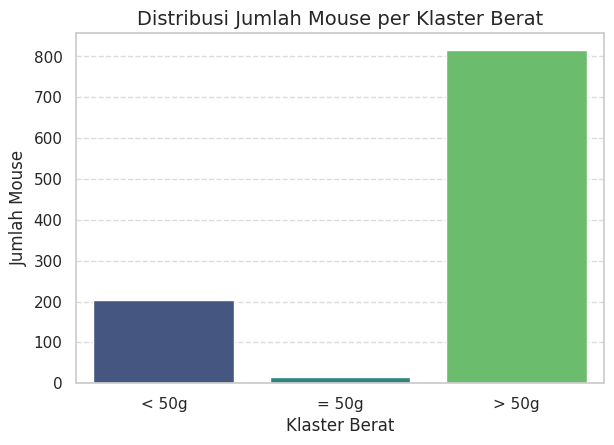

In [47]:
#--Visualisasi Data ---
# Mengatur gaya plot
sns.set_style("whitegrid")
plt.figure(figsize=(15, 10))
###############################################################################
# 3. Visualisasi Distribusi (Count Plot)
plt.subplot(2, 2, 1) # 2 baris, 2 kolom, plot ke-1
sns.countplot(x='Weight_Cluster', data=df_cleaned, palette='viridis')
plt.title('Distribusi Jumlah Mouse per Klaster Berat', fontsize=14)
plt.xlabel('Klaster Berat', fontsize=12)
plt.ylabel('Jumlah Mouse', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

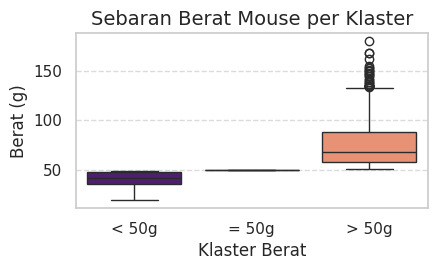

In [48]:
## 4. Visualisasi Sebaran Berat Mouse (Box Plot)
plt.subplot(2, 2, 2) # 2 baris, 2 kolom, plot ke-2
sns.boxplot(x='Weight_Cluster', y='Weight (g)', data=df_cleaned, palette='magma')
plt.title('Sebaran Berat Mouse per Klaster', fontsize=14)
plt.xlabel('Klaster Berat', fontsize=12)
plt.ylabel('Berat (g)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

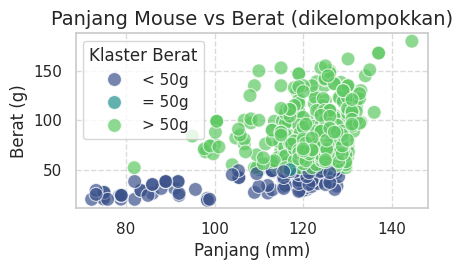

In [50]:
## 5. Visualisasi Dimensi vs Berat (Scatter Plot)
# Scatter plot Panjang vs Berat
plt.subplot(2, 2, 3) # 2 baris, 2 kolom, plot ke-3
sns.scatterplot(x='Length (mm)', y='Weight (g)', hue='Weight_Cluster', data=df_cleaned,
                palette='viridis', s=100, alpha=0.7)
plt.title('Panjang Mouse vs Berat (dikelompokkan)', fontsize=14)
plt.xlabel('Panjang (mm)', fontsize=12)
plt.ylabel('Berat (g)', fontsize=12)
plt.legend(title='Klaster Berat')
plt.grid(True, linestyle='--', alpha=0.7)

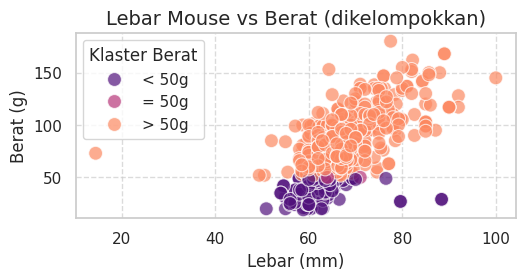

In [51]:
# Scatter plot Lebar vs Berat
plt.subplot(2, 2, 4) # 2 baris, 2 kolom, plot ke-4
sns.scatterplot(x='Width (mm)', y='Weight (g)', hue='Weight_Cluster', data=df_cleaned,
                palette='magma', s=100, alpha=0.7)
plt.title('Lebar Mouse vs Berat (dikelompokkan)', fontsize=14)
plt.xlabel('Lebar (mm)', fontsize=12)
plt.ylabel('Berat (g)', fontsize=12)
plt.legend(title='Klaster Berat')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()